# Exploratory Data Analysis: Amazon Products Sales Dataset

**Objective:** Predict `purchased_last_month` using product characteristics

**Dataset Source:** [Kaggle - Amazon Products Sales Dataset (42K items)](https://www.kaggle.com/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025)

---

## Table of Contents
1. [Data Loading & Initial Exploration](#section1)
2. [Target Variable Analysis](#section2)
3. [Missing Values Analysis](#section3)
4. [Numerical Features Analysis](#section4)
5. [Categorical Features Analysis](#section5)
6. [Feature Correlations & Relationships](#section6)
7. [Key Insights & Recommendations](#section7)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


<a id='section1'></a>
## 1. Data Loading & Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('amazon_products_sales_data_cleaned.csv')

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: 42,675 rows × 17 columns

Memory Usage: 56.77 MB


In [3]:
# Display first few rows
print("\n=== First 5 Rows ===")
df.head()


=== First 5 Rows ===


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.60,375.00,300.00,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.30,2457.00,6000.00,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.60,3044.00,2000.00,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.60,35882.00,10000.00,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.80,28988.00,10000.00,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [4]:
# Display last few rows
print("\n=== Last 5 Rows ===")
df.tail()


=== Last 5 Rows ===


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.00,1.00,100.00,195.99,195.99,No Badge,Organic,No Coupon,NaN,2025-09-04,NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.20,20.00,200.00,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.30,57.00,50.00,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.70,7102.00,500.00,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98
42674,Lorex Fusion 1080p HD Security Camera System w...,4.40,75.00,50.00,419.99,499.99,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71wTn+zoSr...,https://www.amazon.com/Lorex-8-Channel-Securit...,2025-08-30 19:56:33,Cameras,16.00


In [5]:
# Dataset information
print("\n=== Dataset Info ===")
df.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 1

In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")


Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [7]:
# Column data types
print("\n=== Column Data Types ===")
print(df.dtypes)


=== Column Data Types ===
product_title            object
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller           object
is_sponsored             object
has_coupon               object
buy_box_availability     object
delivery_date            object
sustainability_tags      object
product_image_url        object
product_page_url         object
data_collected_at        object
product_category         object
discount_percentage     float64
dtype: object


<a id='section2'></a>
## 2. Target Variable Analysis: `purchased_last_month`

In [8]:
# Summary statistics for target variable
print("=== Target Variable: purchased_last_month ===")
print(f"\nMissing values: {df['purchased_last_month'].isna().sum():,} ({df['purchased_last_month'].isna().sum()/len(df)*100:.2f}%)")
print(f"\nBasic Statistics:")
print(df['purchased_last_month'].describe())

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"Median: {df['purchased_last_month'].median():.2f}")
print(f"Mode: {df['purchased_last_month'].mode().values[0] if len(df['purchased_last_month'].mode()) > 0 else 'N/A'}")
print(f"Skewness: {df['purchased_last_month'].skew():.2f}")
print(f"Kurtosis: {df['purchased_last_month'].kurtosis():.2f}")

=== Target Variable: purchased_last_month ===

Missing values: 10,511 (24.63%)

Basic Statistics:
count    32164.00
mean      1293.67
std       6318.32
min         50.00
25%        100.00
50%        200.00
75%        400.00
max     100000.00
Name: purchased_last_month, dtype: float64

Additional Statistics:
Median: 200.00
Mode: 100.0
Skewness: 10.72
Kurtosis: 139.69


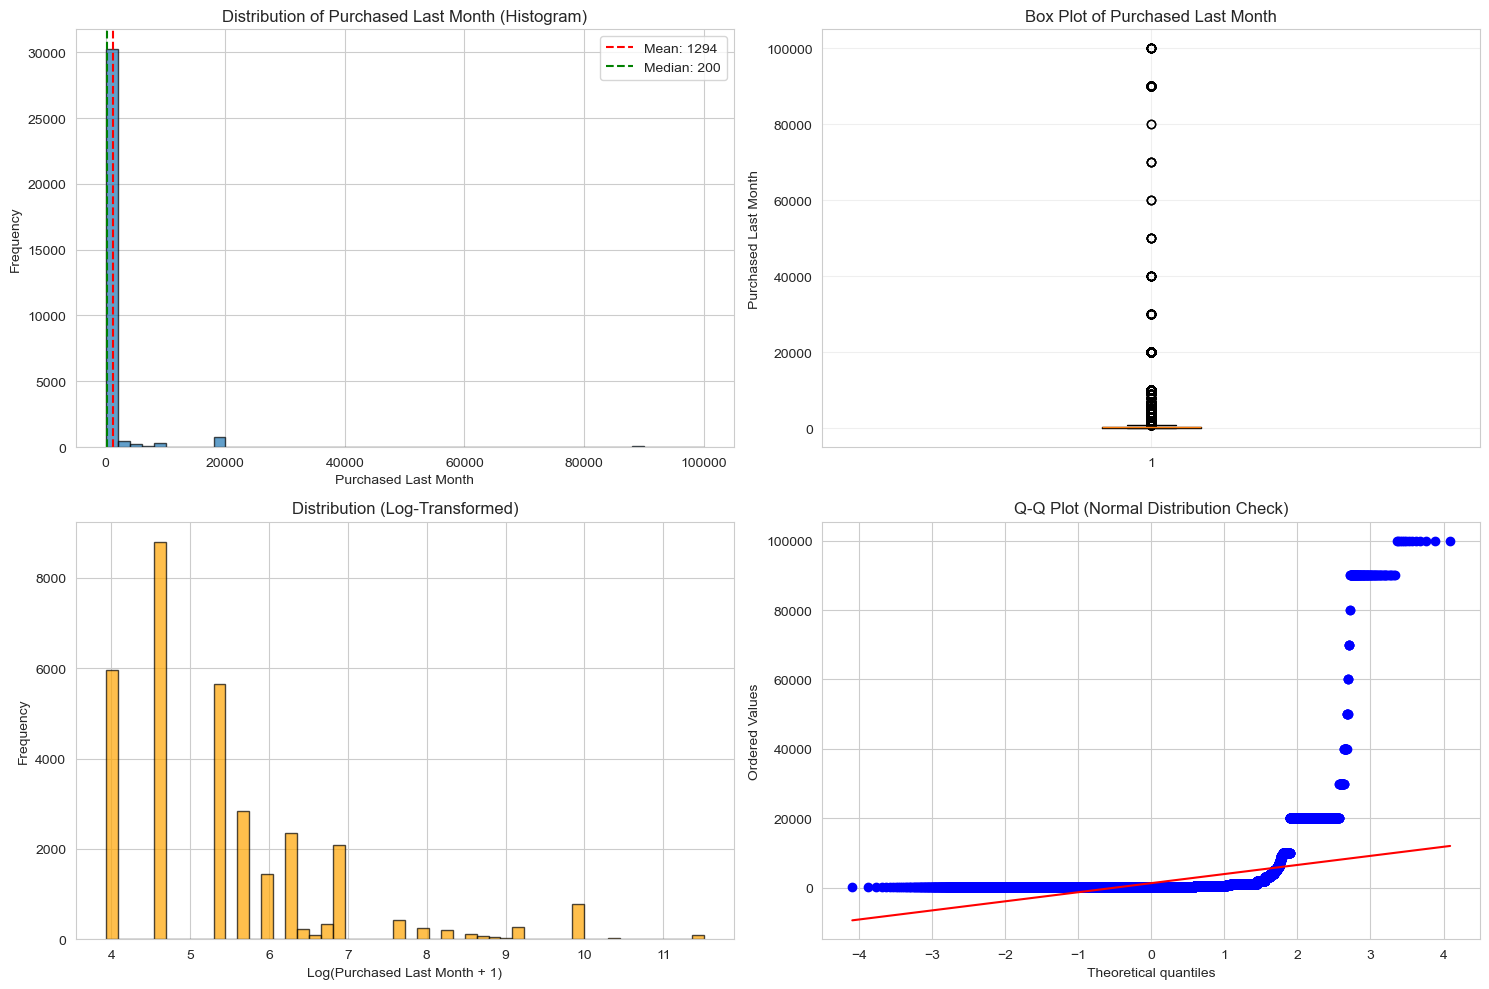

In [9]:
# Visualize target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['purchased_last_month'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Purchased Last Month')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Purchased Last Month (Histogram)')
axes[0, 0].axvline(df['purchased_last_month'].mean(), color='red', linestyle='--', label=f'Mean: {df["purchased_last_month"].mean():.0f}')
axes[0, 0].axvline(df['purchased_last_month'].median(), color='green', linestyle='--', label=f'Median: {df["purchased_last_month"].median():.0f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['purchased_last_month'].dropna(), vert=True)
axes[0, 1].set_ylabel('Purchased Last Month')
axes[0, 1].set_title('Box Plot of Purchased Last Month')
axes[0, 1].grid(True, alpha=0.3)

# Log-scale histogram
log_data = np.log1p(df['purchased_last_month'].dropna())
axes[1, 0].hist(log_data, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Log(Purchased Last Month + 1)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution (Log-Transformed)')

# Q-Q plot
stats.probplot(df['purchased_last_month'].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normal Distribution Check)')

plt.tight_layout()
plt.show()

In [10]:
# Identify outliers using IQR method
Q1 = df['purchased_last_month'].quantile(0.25)
Q3 = df['purchased_last_month'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['purchased_last_month'] < lower_bound) | (df['purchased_last_month'] > upper_bound)]
print(f"\nOutliers detected (IQR method): {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")


Outliers detected (IQR method): 4,511 (10.57%)
Lower bound: -350.00
Upper bound: 850.00


<a id='section3'></a>
## 3. Missing Values Analysis

In [11]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum(),
    'Missing_Percentage': (df.isna().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

missing_data = missing_data[missing_data['Missing_Count'] > 0]

print("=== Missing Values Summary ===")
if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("No missing values found in the dataset!")

=== Missing Values Summary ===
              Column  Missing_Count  Missing_Percentage
 sustainability_tags          39267               92.01
buy_box_availability          14653               34.34
       delivery_date          11983               28.08
purchased_last_month          10511               24.63
    product_page_url           2069                4.85
 discount_percentage           2062                4.83
    discounted_price           2062                4.83
      original_price           2062                4.83
       total_reviews           1024                2.40
      product_rating           1024                2.40


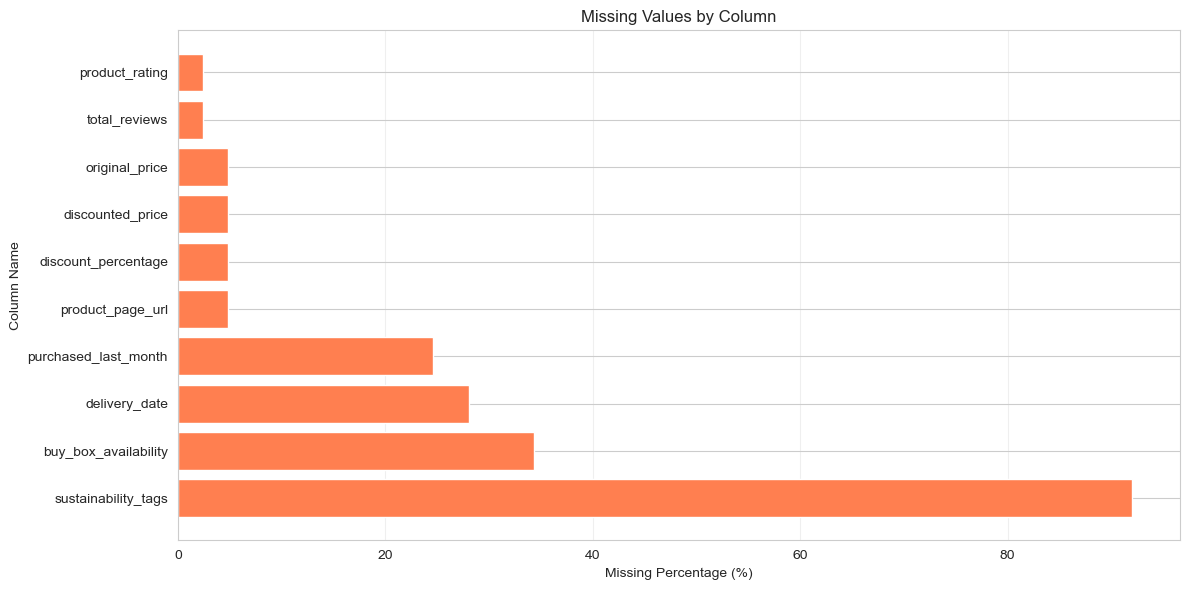

In [12]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Column Name')
    plt.title('Missing Values by Column')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")

<a id='section4'></a>
## 4. Numerical Features Analysis

In [13]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Numerical columns (6): ['product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'discount_percentage']


In [14]:
# Summary statistics for all numerical features
print("\n=== Numerical Features Summary Statistics ===")
df[numerical_cols].describe().T


=== Numerical Features Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max
product_rating,41651.00,4.40,0.39,1.00,4.20,4.50,4.70,5.00
total_reviews,41651.00,3087.11,13030.46,1.00,82.00,343.00,1886.00,865598.00
purchased_last_month,32164.00,1293.67,6318.32,50.00,100.00,200.00,400.00,100000.00
discounted_price,40613.00,243.23,473.35,2.16,29.69,84.99,224.00,5449.00
original_price,40613.00,257.61,496.63,2.16,32.99,89.00,229.99,5449.00
discount_percentage,40613.00,6.55,12.74,0.00,0.00,0.00,8.49,85.42


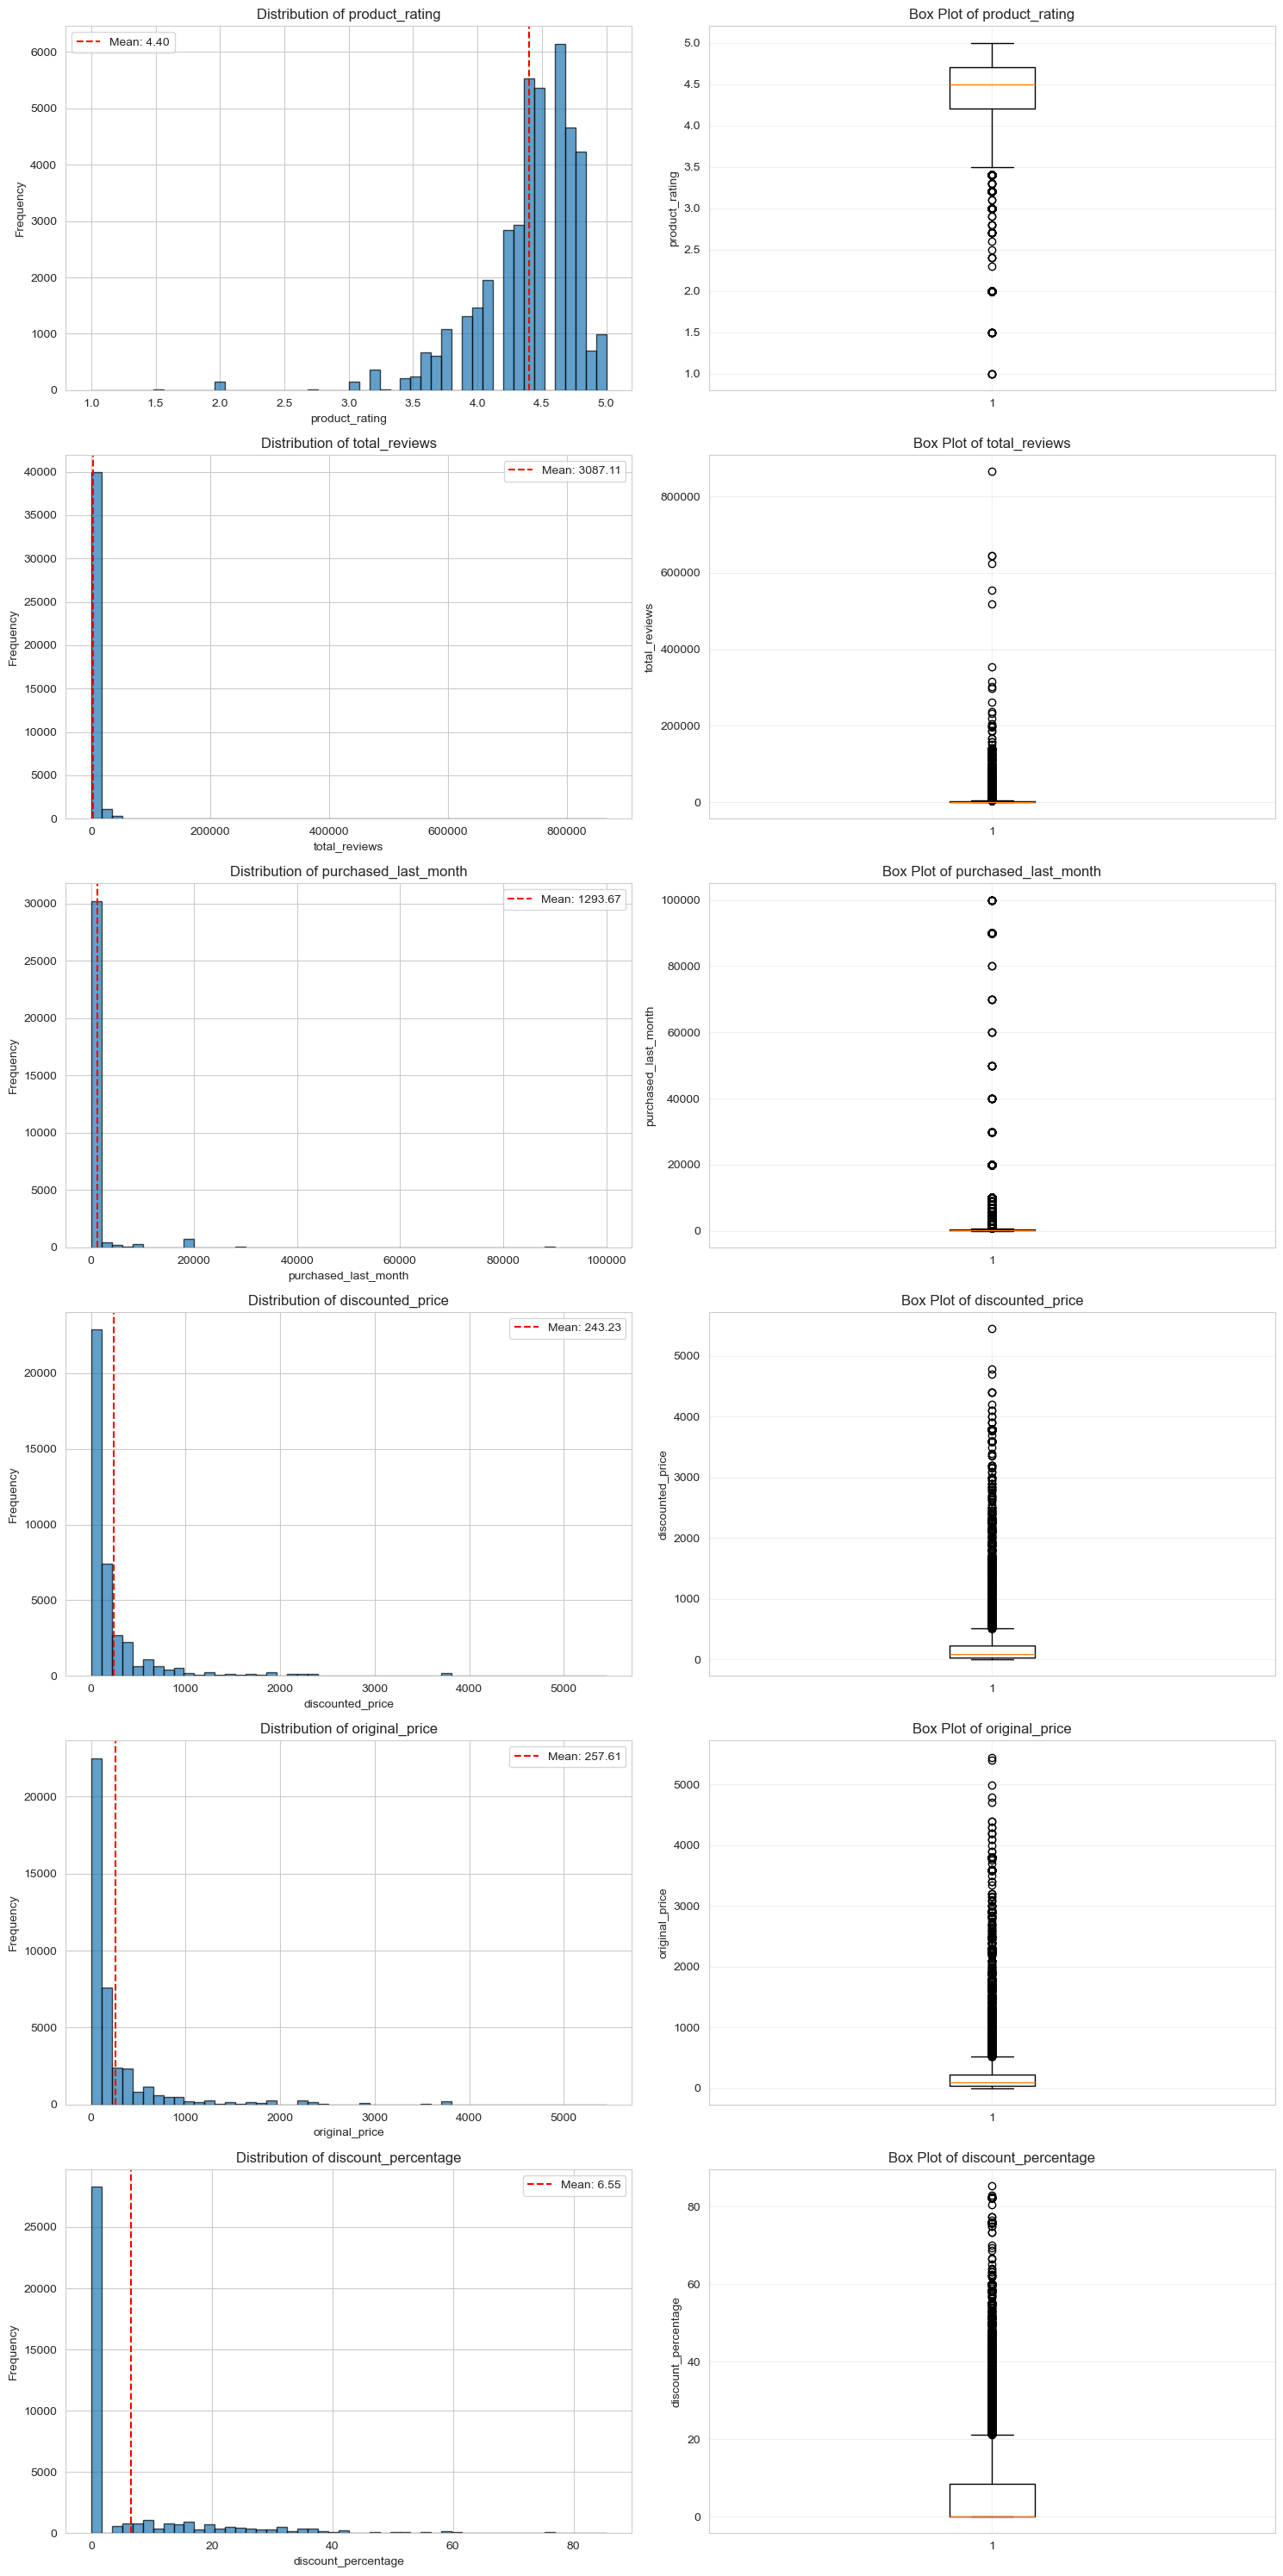

In [15]:
# Distribution of numerical features
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[idx, 0].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[idx, 0].legend()
    
    # Box plot
    axes[idx, 1].boxplot(df[col].dropna(), vert=True)
    axes[idx, 1].set_ylabel(col)
    axes[idx, 1].set_title(f'Box Plot of {col}')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

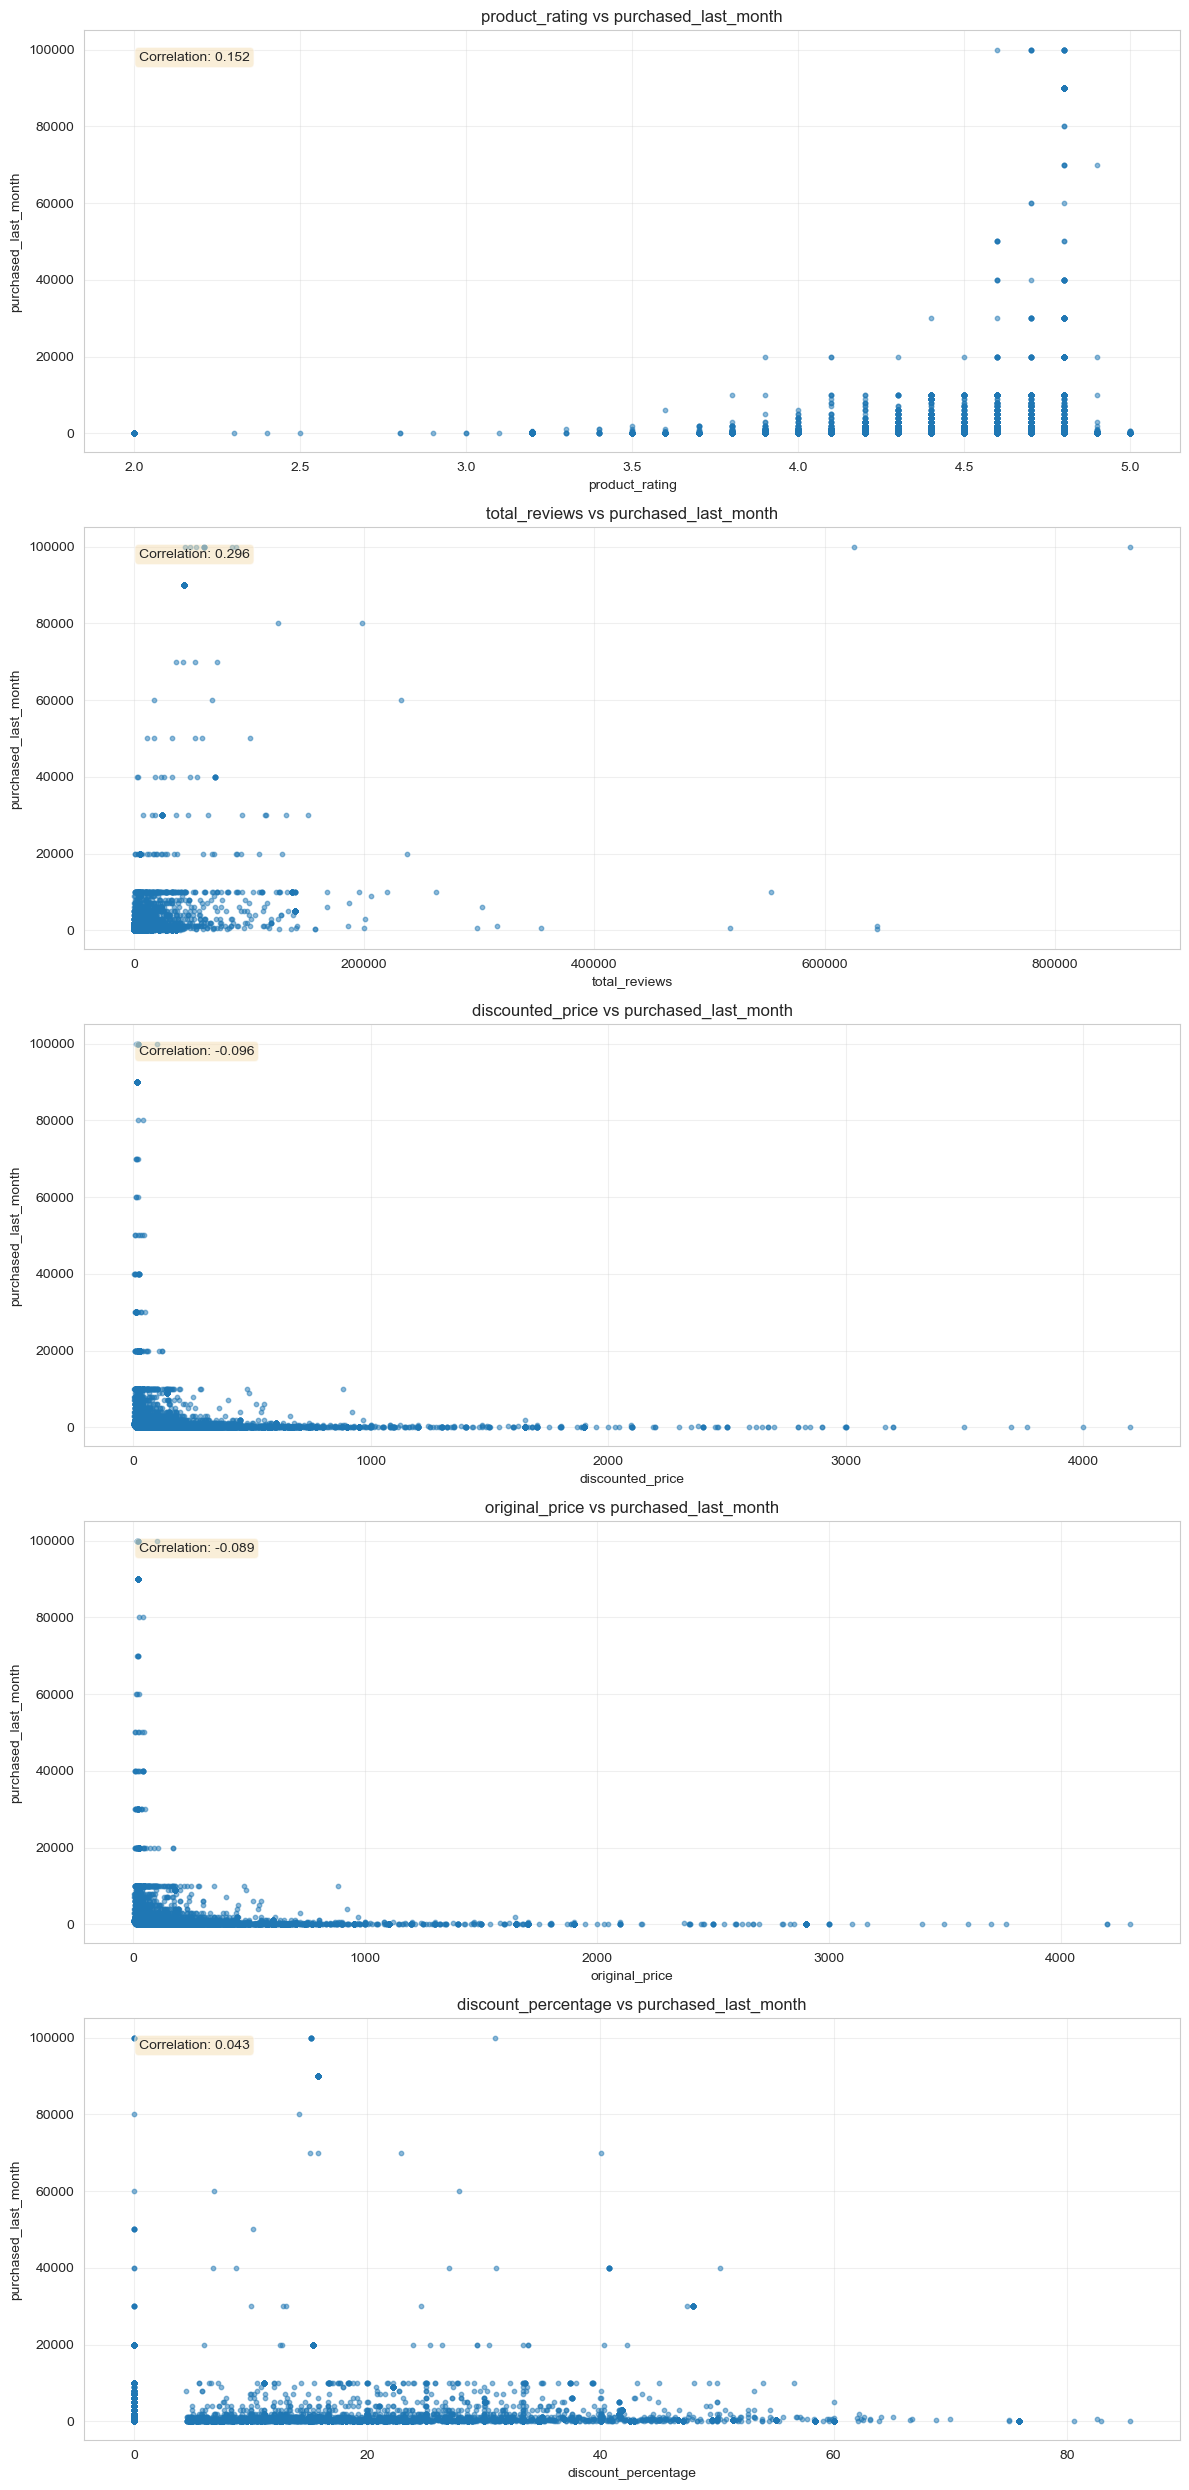

In [16]:
# Scatter plots: Numerical features vs Target
target_col = 'purchased_last_month'
feature_cols = [col for col in numerical_cols if col != target_col]

if len(feature_cols) > 0:
    fig, axes = plt.subplots(len(feature_cols), 1, figsize=(12, 5*len(feature_cols)))
    
    if len(feature_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(feature_cols):
        # Create scatter plot
        valid_data = df[[col, target_col]].dropna()
        axes[idx].scatter(valid_data[col], valid_data[target_col], alpha=0.5, s=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(target_col)
        axes[idx].set_title(f'{col} vs {target_col}')
        axes[idx].grid(True, alpha=0.3)
        
        # Calculate correlation
        corr = valid_data[col].corr(valid_data[target_col])
        axes[idx].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                      transform=axes[idx].transAxes, 
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

<a id='section5'></a>
## 5. Categorical Features Analysis

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Exclude URL and text columns from detailed analysis
excluded_cols = ['product_title', 'product_image_url', 'product_page_url', 'delivery_date', 'data_collected_at']
categorical_cols = [col for col in categorical_cols if col not in excluded_cols]

print(f"Categorical columns for analysis ({len(categorical_cols)}): {categorical_cols}")

Categorical columns for analysis (6): ['is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'sustainability_tags', 'product_category']


In [18]:
# Value counts for each categorical feature
for col in categorical_cols:
    print(f"\n=== {col} ===")
    value_counts = df[col].value_counts()
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nTop 10 values:")
    print(value_counts.head(10))
    print(f"\nPercentage distribution (top 10):")
    print((value_counts.head(10) / len(df) * 100).round(2))


=== is_best_seller ===
Unique values: 12

Top 10 values:
is_best_seller
No Badge             40814
Amazon's               744
Limited time deal      409
Best Seller            275
Save 30%               125
Ends in                 97
Save 10%                61
Save 18%                57
Save 17%                51
Save 12%                26
Name: count, dtype: int64

Percentage distribution (top 10):
is_best_seller
No Badge            95.64
Amazon's             1.74
Limited time deal    0.96
Best Seller          0.64
Save 30%             0.29
Ends in              0.23
Save 10%             0.14
Save 18%             0.13
Save 17%             0.12
Save 12%             0.06
Name: count, dtype: float64

=== is_sponsored ===
Unique values: 2

Top 10 values:
is_sponsored
Organic      35664
Sponsored     7011
Name: count, dtype: int64

Percentage distribution (top 10):
is_sponsored
Organic     83.57
Sponsored   16.43
Name: count, dtype: float64

=== has_coupon ===
Unique values: 42

Top 10 val

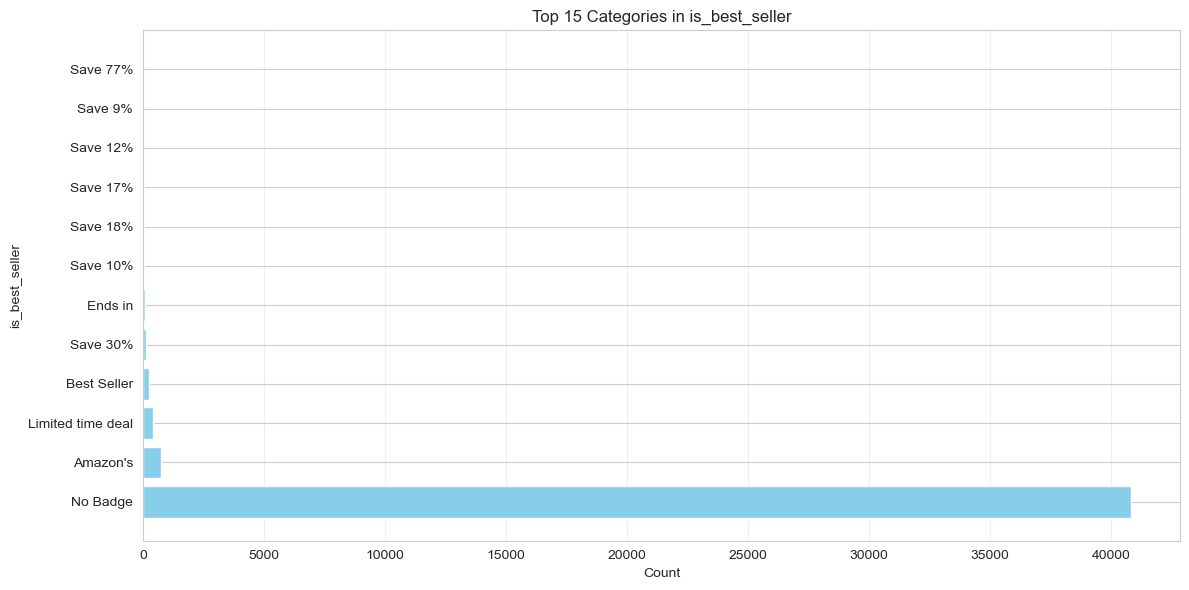

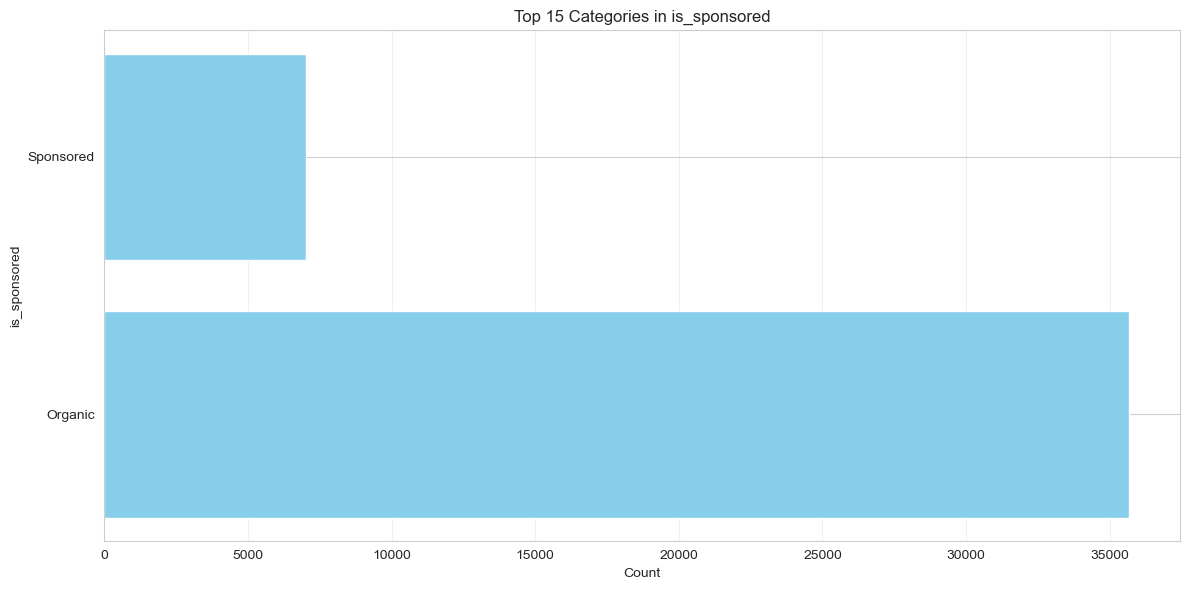

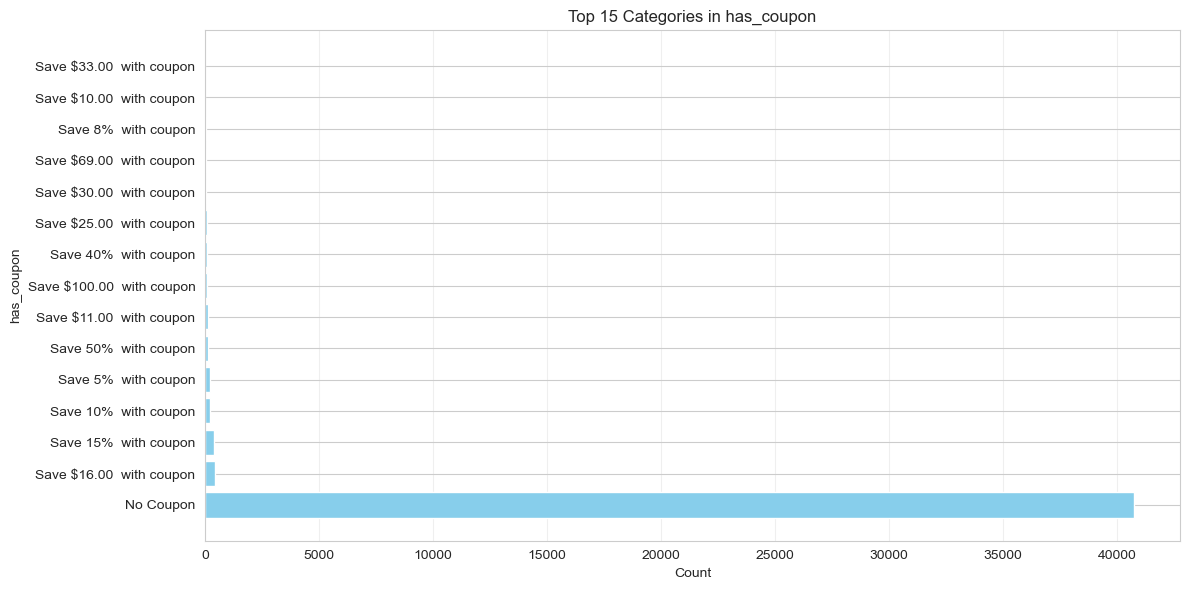

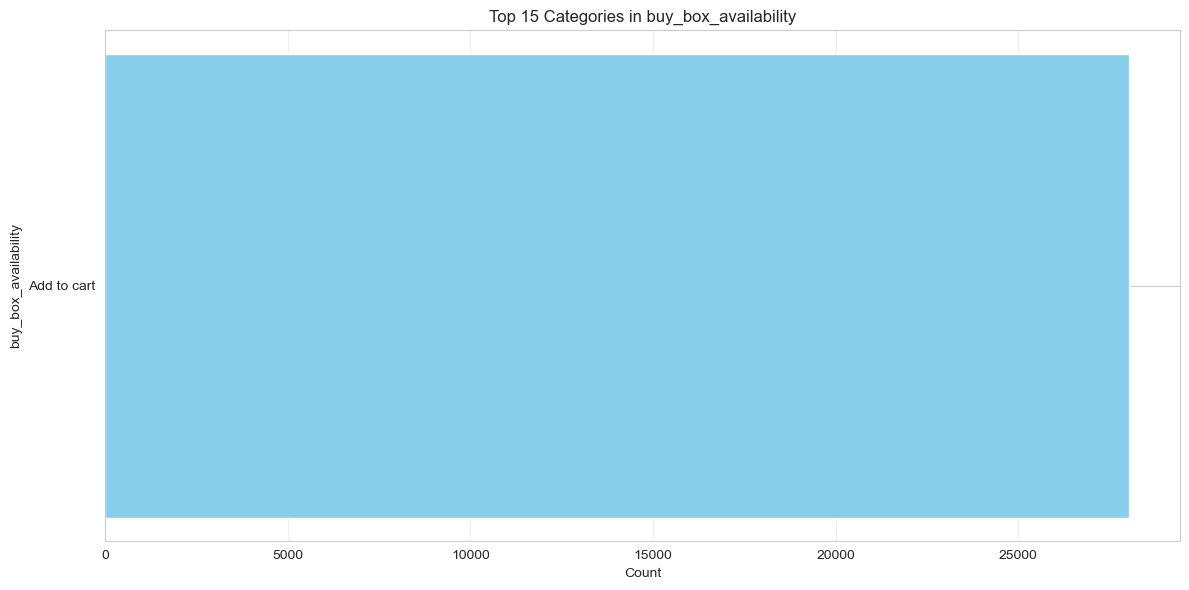

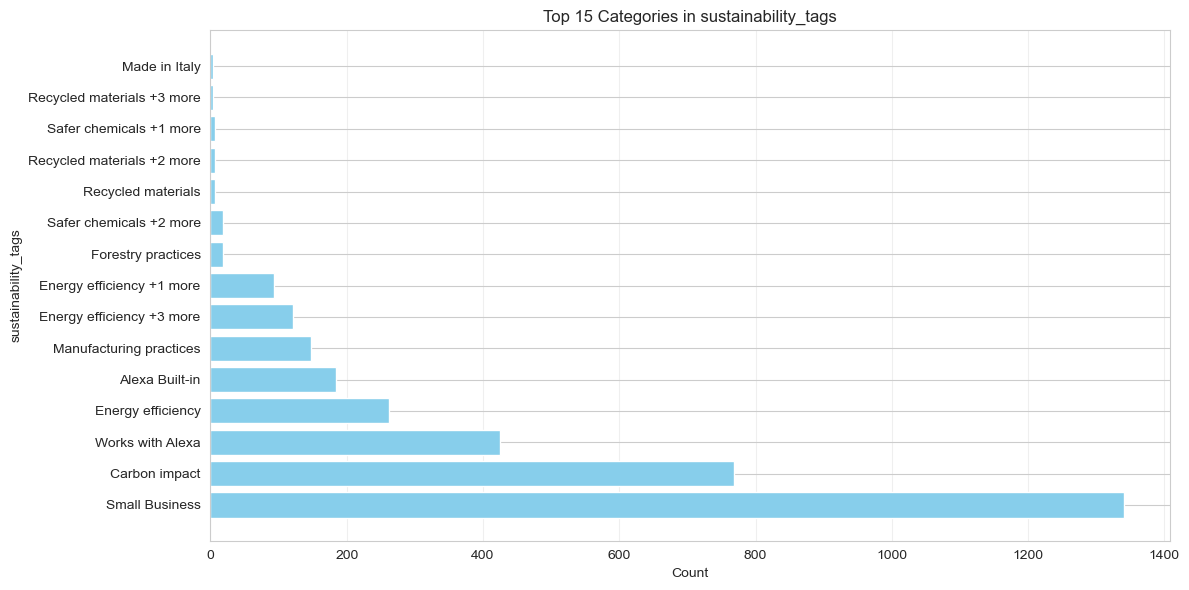

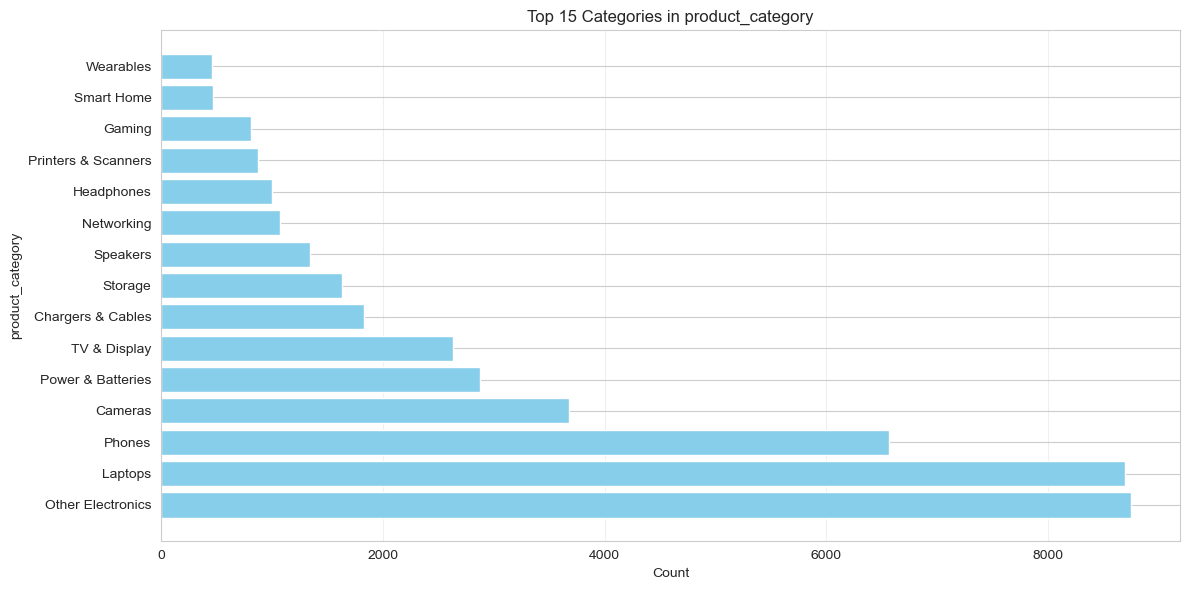

In [19]:
# Visualize categorical features
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Get top 15 categories
    top_categories = df[col].value_counts().head(15)
    
    plt.barh(range(len(top_categories)), top_categories.values, color='skyblue')
    plt.yticks(range(len(top_categories)), top_categories.index)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.title(f'Top 15 Categories in {col}')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


=== Average purchased_last_month by is_best_seller ===
                     mean  median  count
is_best_seller                          
Best Seller       9228.62 6000.00    269
Limited time deal 6889.68  400.00    402
Amazon's          4398.74  300.00    672
No Badge          1094.37  200.00  30465
Ends in            409.28  600.00     97
Save 17%           100.00  100.00     51
Save 30%           100.00  100.00    125
Save 12%            50.00   50.00     26
Save 18%            50.00   50.00     57
Save 10%              NaN     NaN      0
Save 77%              NaN     NaN      0
Save 9%               NaN     NaN      0


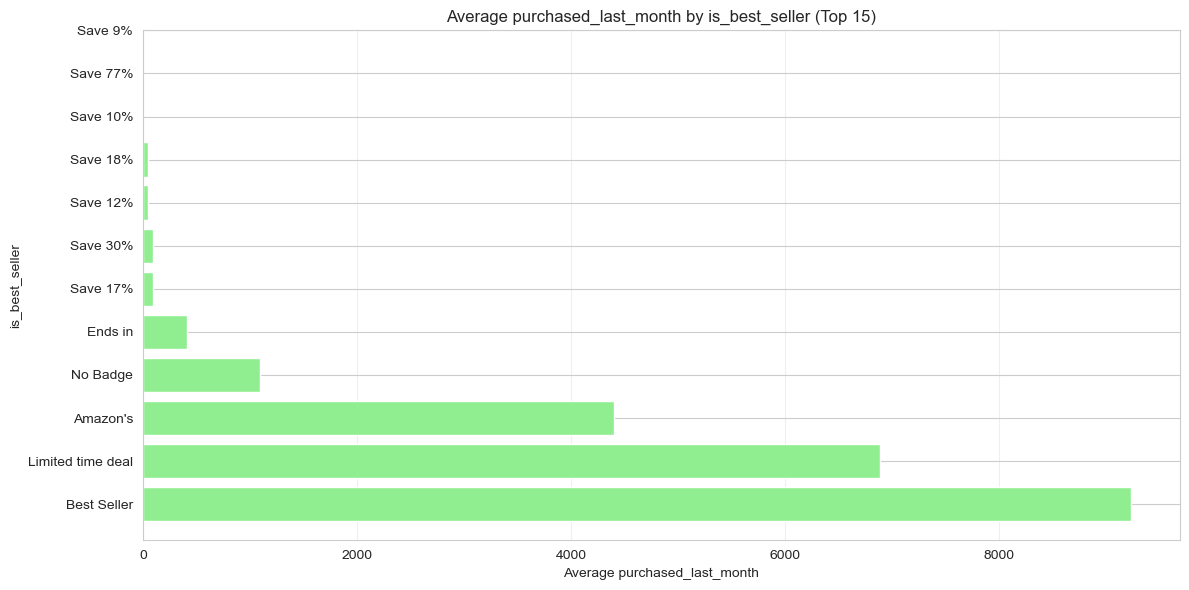


=== Average purchased_last_month by is_sponsored ===
                mean  median  count
is_sponsored                       
Sponsored    7681.15 1000.00   3603
Organic       487.88  200.00  28561


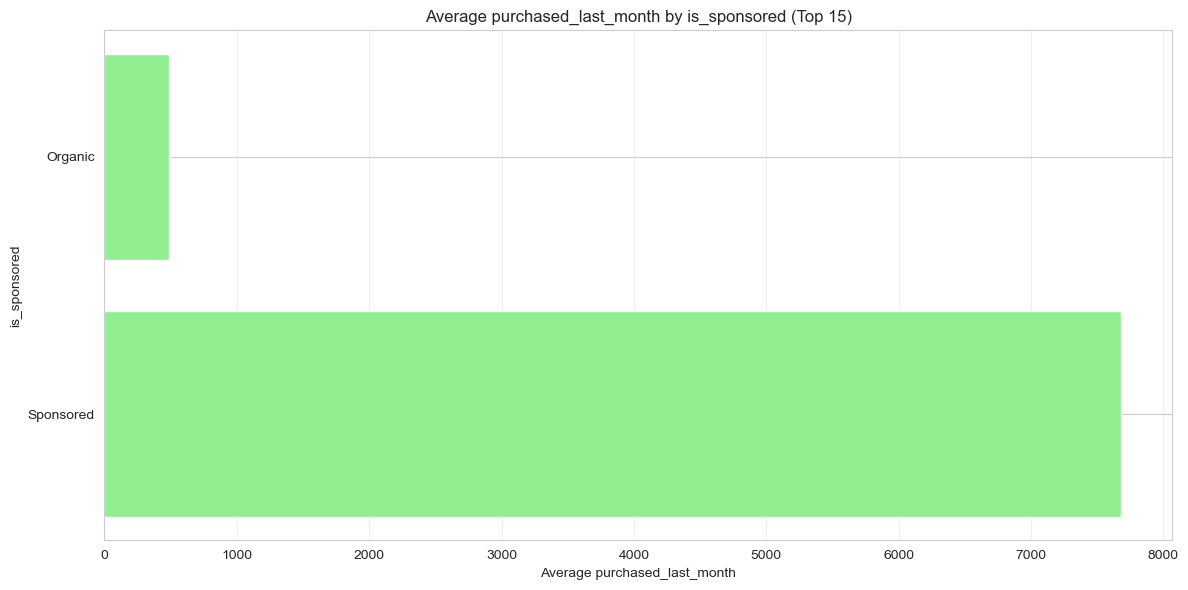


=== Average purchased_last_month by has_coupon ===
                             mean   median  count
has_coupon                                       
Save $0.33  with coupon  20000.00 20000.00      1
Save 6%  with coupon      8000.00  8000.00      2
Save $2.00  with coupon   6833.33 10000.00      3
Save $4.00  with coupon   6333.33  6000.00      3
Save 7%  with coupon      6000.00  6000.00      1
Save $1.00  with coupon   2625.00  3000.00      4
Save $1.50  with coupon   2500.00  2500.00      2
Save $8.00  with coupon   1750.00  1750.00      2
Save $18.00  with coupon  1687.50   100.00      8
No Coupon                 1313.06   200.00  31043
Save 15%  with coupon     1027.64  1000.00    398
Save 8%  with coupon      1000.00  1000.00     18
Save 5%  with coupon       915.26  1000.00    190
Save 25%  with coupon      833.33  1000.00      3
Save $5.00  with coupon    750.00   750.00      2


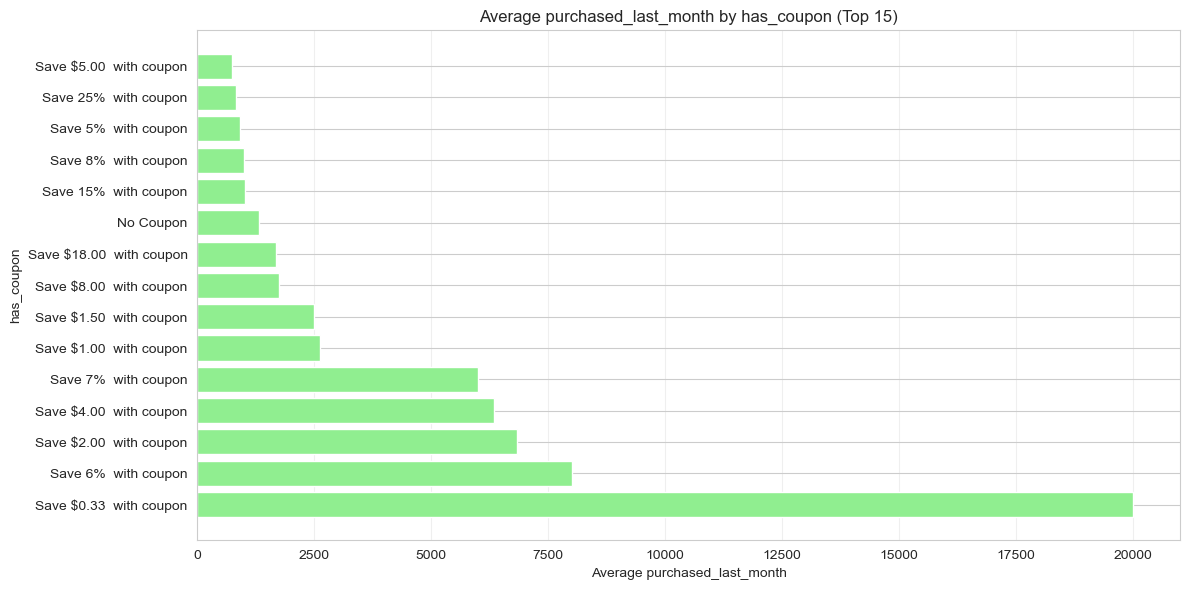


=== Average purchased_last_month by buy_box_availability ===
                        mean  median  count
buy_box_availability                       
Add to cart          1601.94  200.00  23502


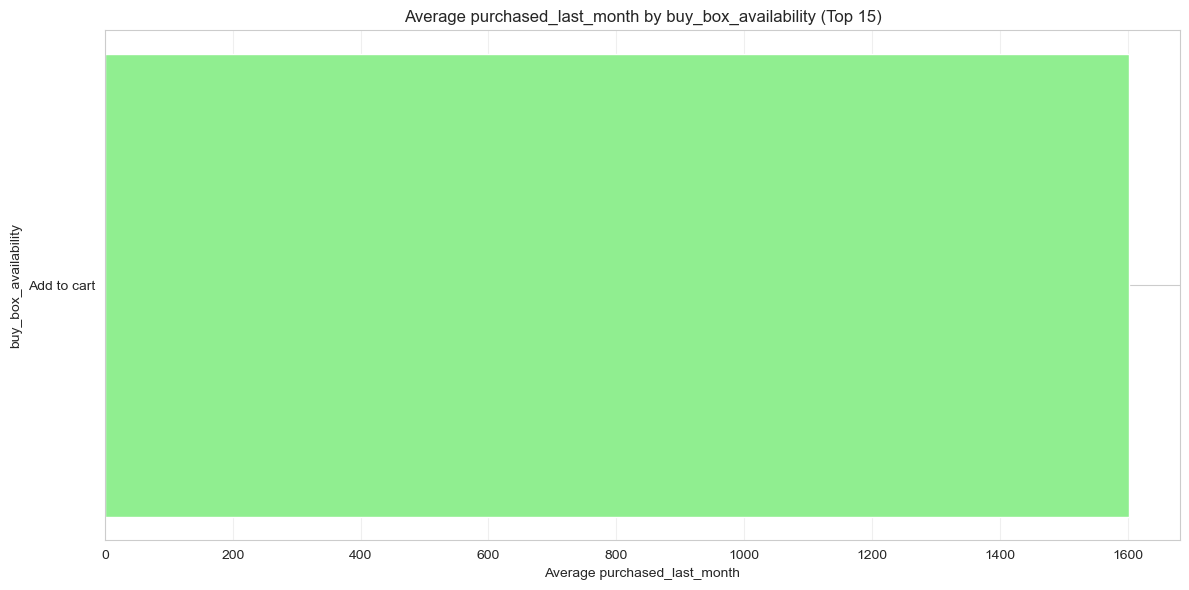


=== Average purchased_last_month by sustainability_tags ===
                                   mean   median  count
sustainability_tags                                    
1 sustainability certification 80000.00 80000.00      1
Safer chemicals +1 more        44950.00 32500.00      6
Forestry practices              5544.44  1000.00     18
Manufacturing practices         5221.88  2000.00     64
Recycled materials              2633.33  1000.00      6
Recycled materials +3 more      1375.00   700.00      4
Carbon impact                   1346.48   300.00    767
Energy efficiency                912.50   100.00     56
Works with Alexa                 880.69   100.00    378
Safer chemicals +2 more          667.65   200.00     17
Recycled materials +2 more       657.14   300.00      7
Energy efficiency +3 more        586.07   100.00     61
Small Business                   576.69   300.00   1079
Energy efficiency +1 more        303.23   300.00     93
Alexa Built-in                   294.48    

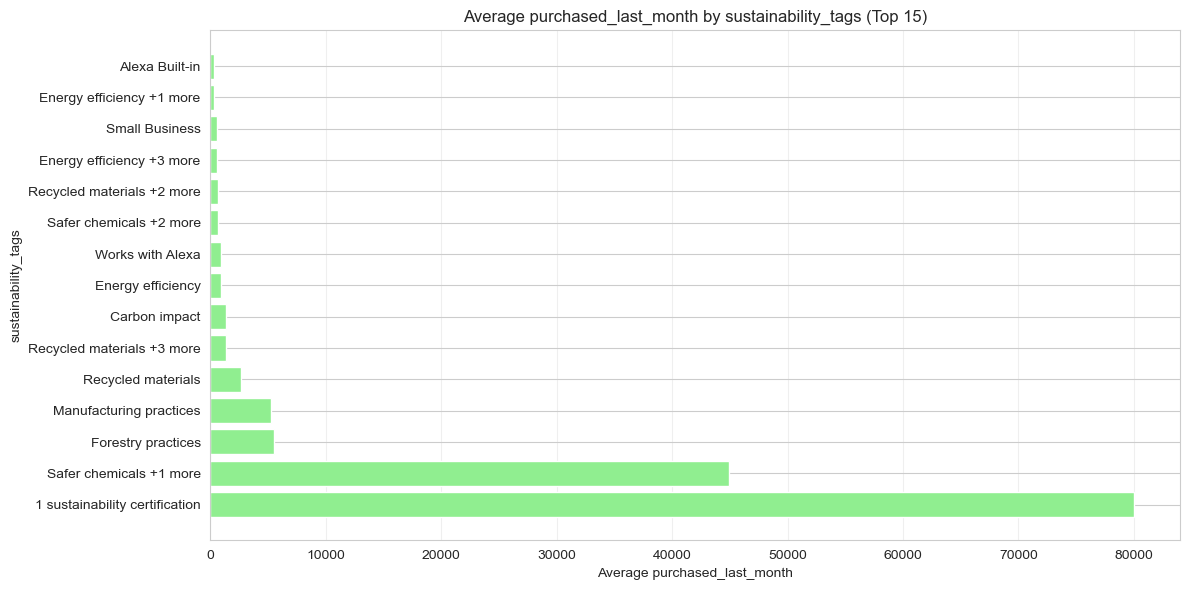


=== Average purchased_last_month by product_category ===
                       mean  median  count
product_category                          
Power & Batteries   9396.86 1000.00   2783
Wearables           1757.16  800.00    447
Phones               642.36  300.00   5806
Other Electronics    631.48  200.00   5425
Chargers & Cables    531.79  200.00   1546
TV & Display         521.30  200.00   1373
Storage              515.29  200.00    958
Laptops              514.99  100.00   6634
Smart Home           350.99  100.00    253
Printers & Scanners  331.34  100.00    876
Networking           327.48  200.00    846
Cameras              321.39  100.00   2599
Speakers             234.36  200.00    959
Headphones           231.17  100.00    993
Gaming               185.44  100.00    666


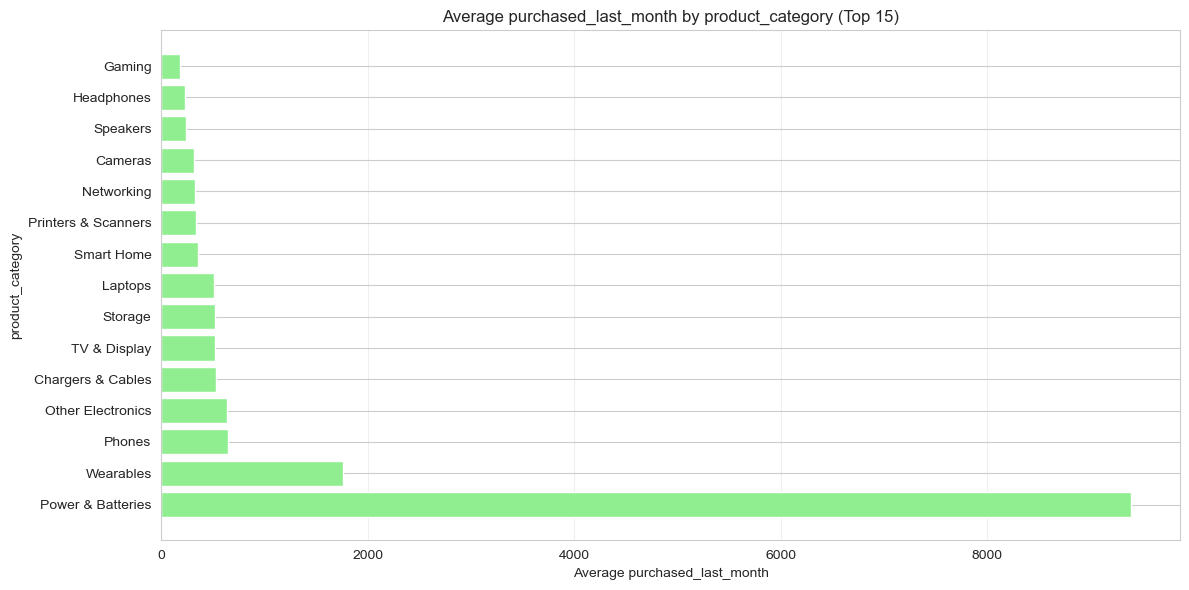

In [20]:
# Categorical features vs Target variable
target_col = 'purchased_last_month'

for col in categorical_cols:
    print(f"\n=== Average {target_col} by {col} ===")
    
    avg_by_category = df.groupby(col)[target_col].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print(avg_by_category.head(15))
    
    # Visualize top 15 categories
    plt.figure(figsize=(12, 6))
    top_15 = avg_by_category.head(15)
    plt.barh(range(len(top_15)), top_15['mean'].values, color='lightgreen')
    plt.yticks(range(len(top_15)), top_15.index)
    plt.xlabel(f'Average {target_col}')
    plt.ylabel(col)
    plt.title(f'Average {target_col} by {col} (Top 15)')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

<a id='section6'></a>
## 6. Feature Correlations & Relationships

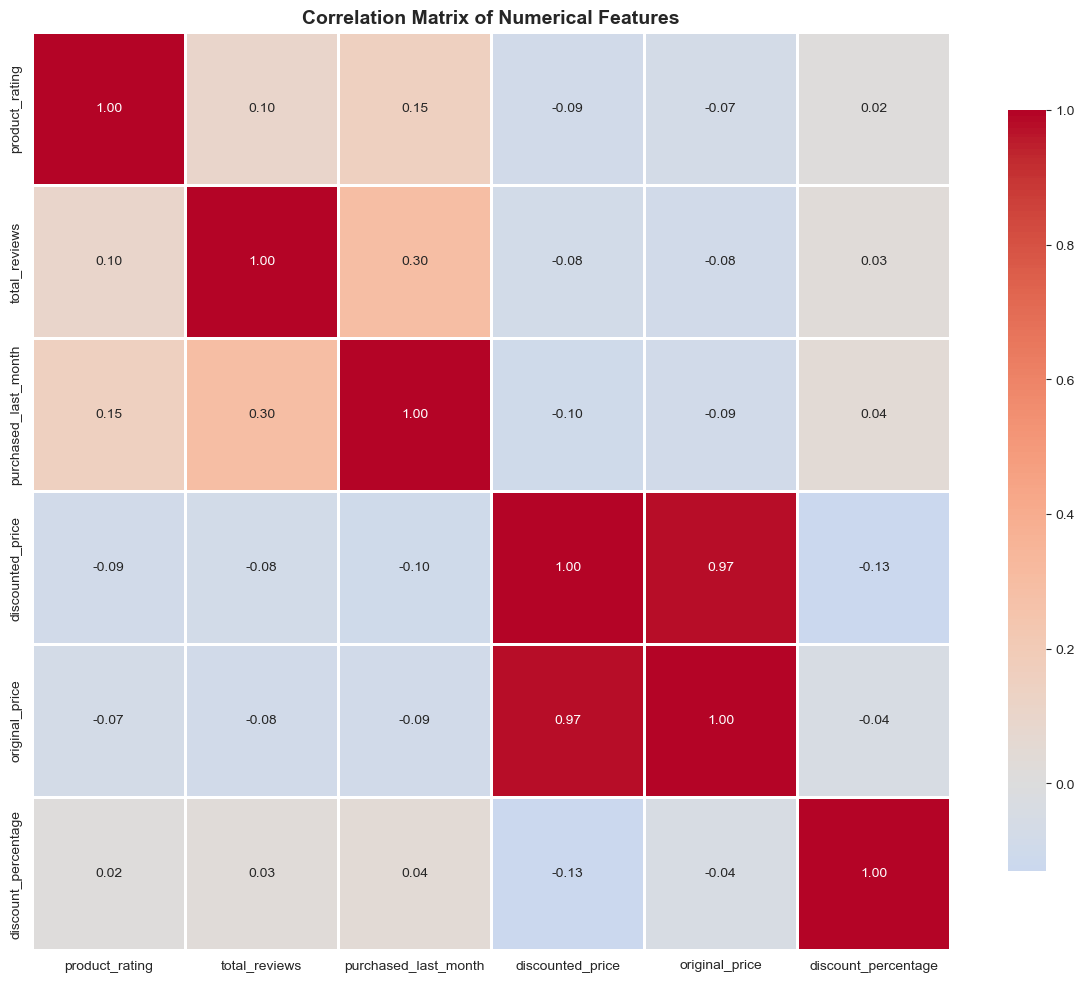

In [21]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

=== Correlation with Target Variable ===
purchased_last_month    1.00
total_reviews           0.30
product_rating          0.15
discount_percentage     0.04
original_price         -0.09
discounted_price       -0.10
Name: purchased_last_month, dtype: float64


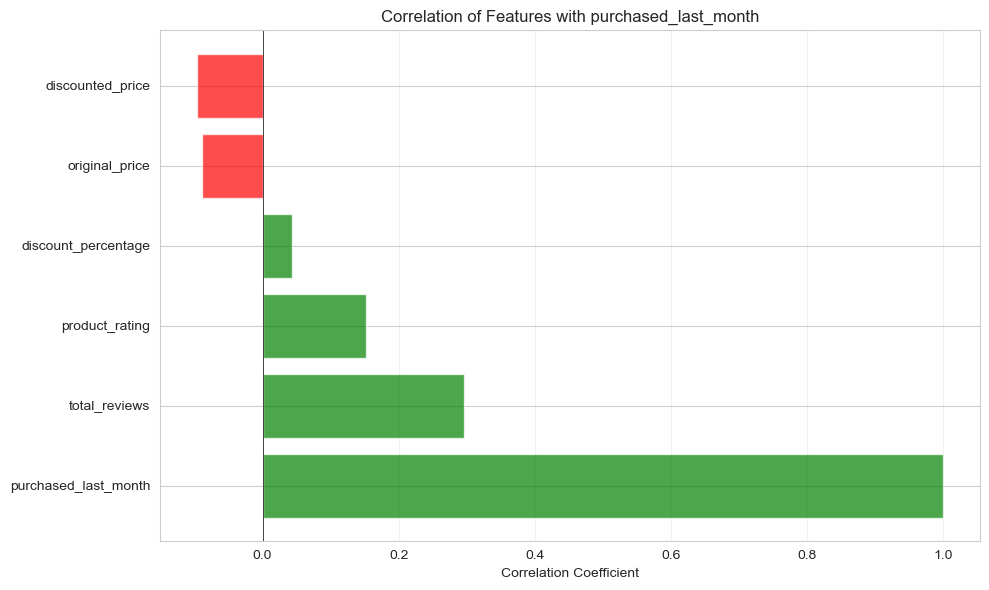

In [22]:
# Correlation with target variable
if target_col in numerical_cols:
    target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
    print("=== Correlation with Target Variable ===")
    print(target_correlations)
    
    # Visualize correlations with target
    plt.figure(figsize=(10, 6))
    colors = ['green' if x > 0 else 'red' for x in target_correlations.values]
    plt.barh(range(len(target_correlations)), target_correlations.values, color=colors, alpha=0.7)
    plt.yticks(range(len(target_correlations)), target_correlations.index)
    plt.xlabel('Correlation Coefficient')
    plt.title(f'Correlation of Features with {target_col}')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [23]:
# Identify highly correlated feature pairs (multicollinearity check)
print("\n=== Highly Correlated Feature Pairs (|correlation| > 0.7) ===")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated feature pairs found.")


=== Highly Correlated Feature Pairs (|correlation| > 0.7) ===
       Feature 1      Feature 2  Correlation
discounted_price original_price         0.97


<a id='section7'></a>
## 7. Key Insights & Recommendations

### Summary of Findings

This section will be filled after running all analyses above. Key areas to document:

#### 7.1 Target Variable (`purchased_last_month`)
- Distribution characteristics (skewness, outliers)
- Typical range of values
- Transformation needs (if any)

#### 7.2 Data Quality
- Missing values patterns and handling strategy
- Duplicate records
- Data type conversions needed

#### 7.3 Important Features
- Features with strongest correlation to target
- Features with multicollinearity issues
- Categorical features with predictive power

#### 7.4 Data Preprocessing Recommendations
- Handling missing values (imputation or removal)
- Outlier treatment
- Feature scaling/normalization needs
- Encoding strategies for categorical variables
- Feature engineering opportunities

#### 7.5 Modeling Strategy Recommendations
- Suggested algorithms based on data characteristics:
  - **Linear Models**: Linear Regression, Ridge, Lasso (if relationships are linear)
  - **Tree-based Models**: Random Forest, XGBoost, LightGBM (for non-linear relationships)
  - **Neural Networks**: If sufficient data and complex patterns
- Cross-validation strategy
- Evaluation metrics (RMSE, MAE, R²)

#### 7.6 Next Steps
1. Data preprocessing pipeline implementation
2. Feature engineering
3. Train-test split
4. Model training and hyperparameter tuning
5. Model evaluation and comparison
6. Final model selection and deployment preparation

In [24]:
# Generate final summary statistics
print("=== FINAL DATASET SUMMARY ===")
print(f"\nTotal rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"\nTarget variable: {target_col}")
print(f"Target mean: {df[target_col].mean():.2f}")
print(f"Target median: {df[target_col].median():.2f}")
print(f"Target std: {df[target_col].std():.2f}")

=== FINAL DATASET SUMMARY ===

Total rows: 42,675
Total columns: 17

Numerical features: 6
Categorical features: 6

Target variable: purchased_last_month
Target mean: 1293.67
Target median: 200.00
Target std: 6318.32


---

## Conclusion

This exploratory data analysis provides a comprehensive understanding of the Amazon products sales dataset. The insights gained will guide the preprocessing steps and modeling approach for predicting `purchased_last_month`.

**Ready for next phase:** Data preprocessing and model development